In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ivhd import IVHDGrad
from time import time

Download MNIST dataset and prepare visualisation function

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.int32)

In [3]:
def visualise(X_train_ivhd, y_train_ivhd):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_train_ivhd[:, 0], y=X_train_ivhd[:, 1], hue=y_train_ivhd, palette="tab10", legend="full", alpha=0.6)
    plt.title(f"IVHD of MNIST Dataset")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    
    plt.show()

In [4]:
ivhd_grad_optimizer_time = {}

Gradient IVHD with Adam optimizer

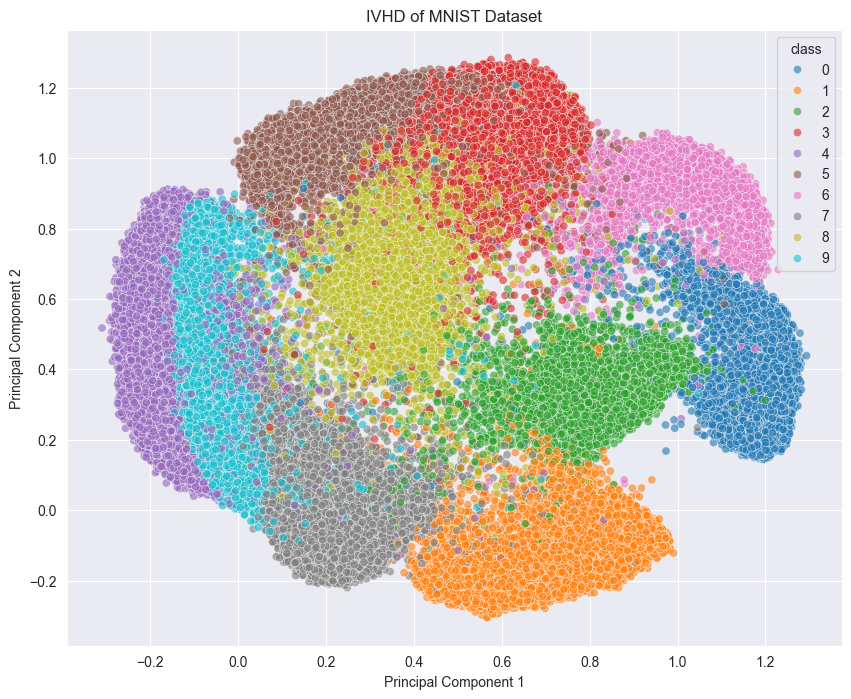

In [5]:
start = time()
ivhd_grad = IVHDGrad(steps=2500, nn=5, rn=5, optimizer='adam', optimizer_params={'lr': 0.01}, pos_weight=0.9, re_draw_remote_neighbors=True)
X_train_ivhd_grad = ivhd_grad.fit_transform(X)
end = time()
ivhd_grad_optimizer_time['Adam'] = end - start

visualise(X_train_ivhd_grad, y)

Gradient IVHD with SGD optimizer

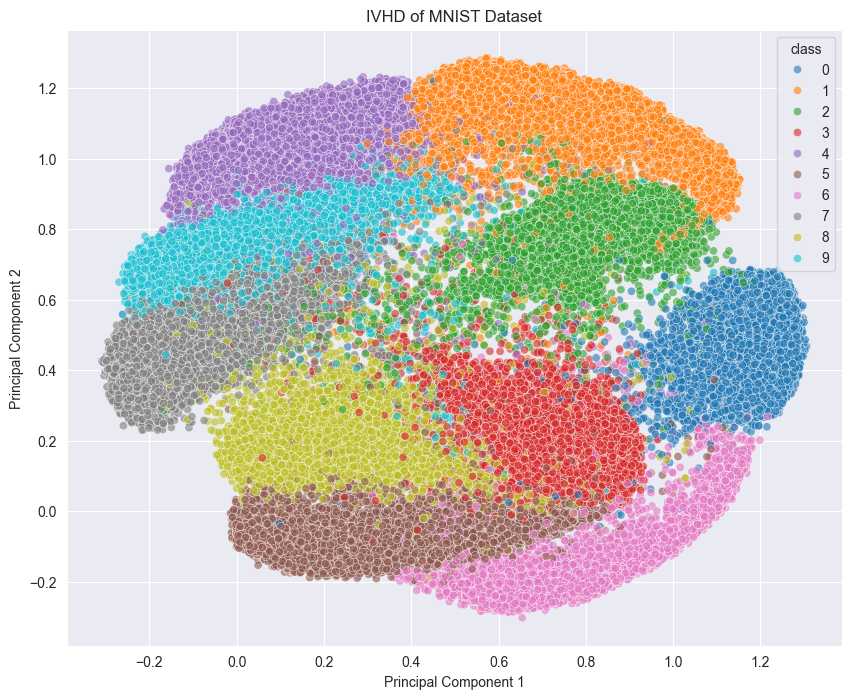

In [6]:
start = time()
ivhd_grad = IVHDGrad(steps=2500, nn=5, rn=5, optimizer='sgd', optimizer_params={'lr': 0.01}, pos_weight=0.9, re_draw_remote_neighbors=True)
X_train_ivhd_grad = ivhd_grad.fit_transform(X)
end = time()
ivhd_grad_optimizer_time['SGD'] = end - start

visualise(X_train_ivhd_grad, y)

Gradient IVHD with ASGD optimizer

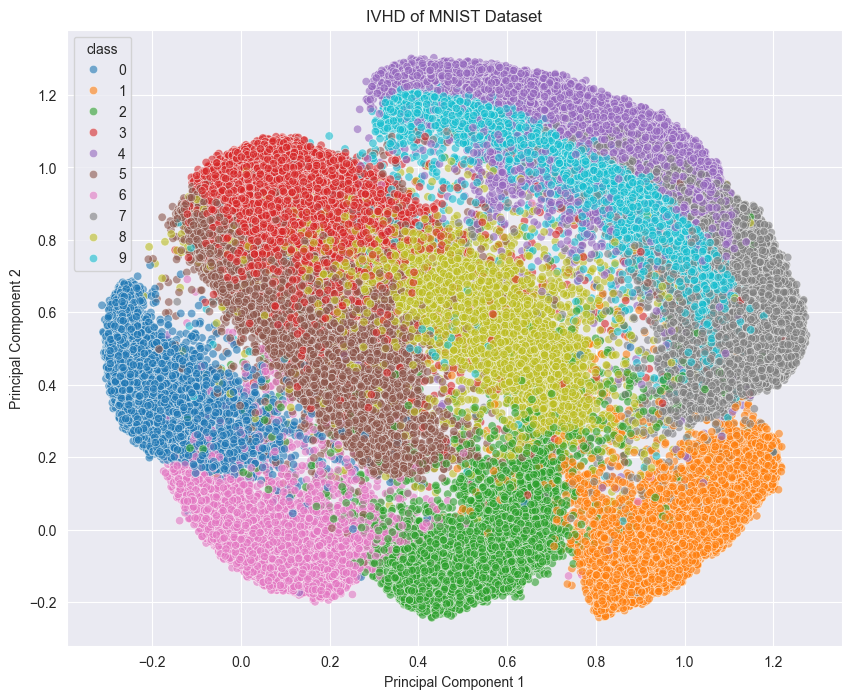

In [8]:
start = time()
ivhd_grad = IVHDGrad(steps=2500, nn=5, rn=5, optimizer='asgd', optimizer_params={'lr': 0.01}, pos_weight=0.9, re_draw_remote_neighbors=True)
X_train_ivhd_grad = ivhd_grad.fit_transform(X)
end = time()
ivhd_grad_optimizer_time['ASGD'] = end - start

visualise(X_train_ivhd_grad, y)

Gradient IVHD with Adadelta optimizer

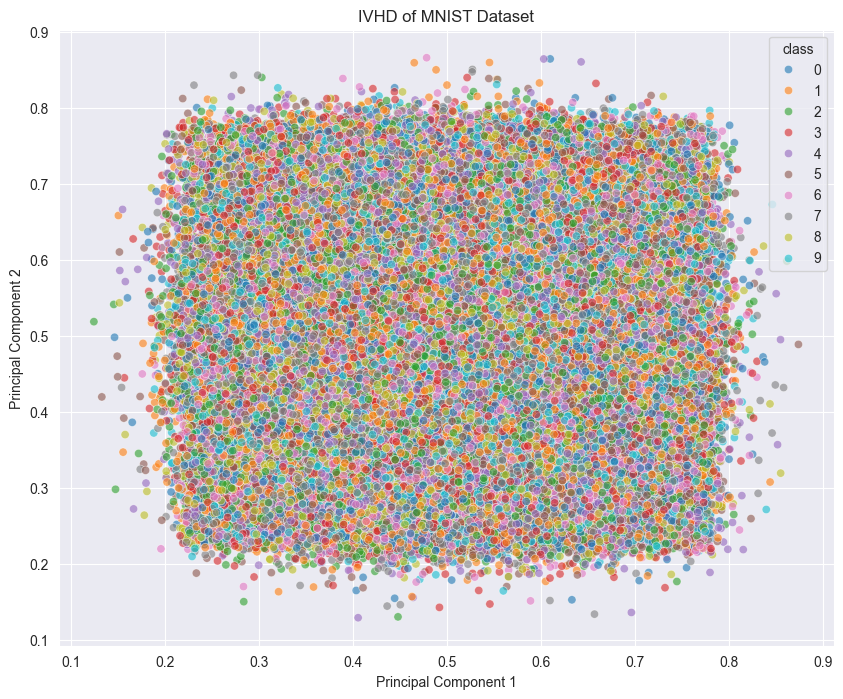

In [9]:
start = time()
ivhd_grad = IVHDGrad(steps=2500, nn=5, rn=5, optimizer='adadelta', optimizer_params={'lr': 0.01}, pos_weight=0.9, re_draw_remote_neighbors=True)
X_train_ivhd_grad = ivhd_grad.fit_transform(X)
end = time()
ivhd_grad_optimizer_time['Adadelta'] = end - start

visualise(X_train_ivhd_grad, y)

Gradient IVHD with Adagrad optimizer


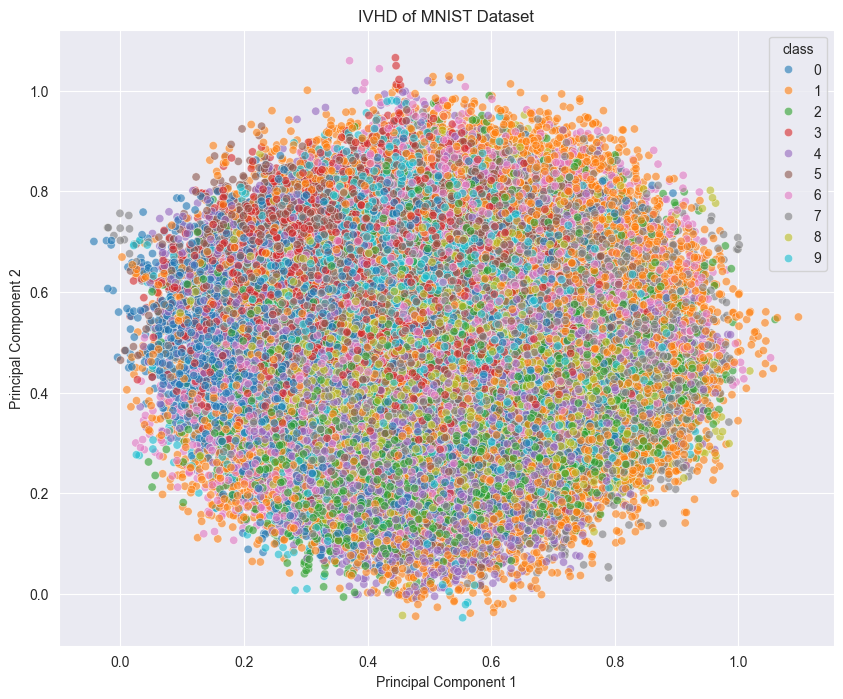

In [10]:
start = time()
ivhd_grad = IVHDGrad(steps=2500, nn=5, rn=5, optimizer='adagrad', optimizer_params={'lr': 0.01}, pos_weight=0.9, re_draw_remote_neighbors=True)
X_train_ivhd_grad = ivhd_grad.fit_transform(X)
end = time()
ivhd_grad_optimizer_time['Adagrad'] = end - start

visualise(X_train_ivhd_grad, y)

Optimizers time comparison

In [11]:
max_alg_name = max(len(name) for name in ivhd_grad_optimizer_time.keys())

print(f"{'Name'.ljust(max_alg_name)} | Time[s]")
print('-' * (max_alg_name + 7))
for alg_name, execution_time in ivhd_grad_optimizer_time.items():
    print(f"{alg_name.ljust(max_alg_name)} | {execution_time}")

Name     | Time[s]
---------------
Adam     | 134.08188700675964
SGD      | 137.90390491485596
ASGD     | 128.0352590084076
Adadelta | 132.30075812339783
Adagrad  | 128.28470301628113
